# Camera Calibration

In [2]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle

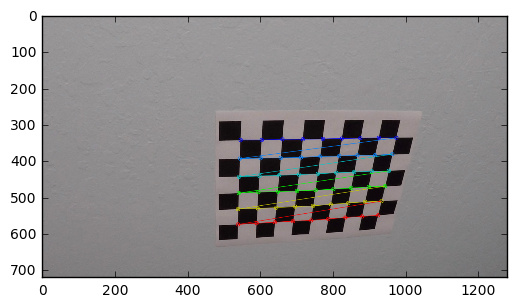

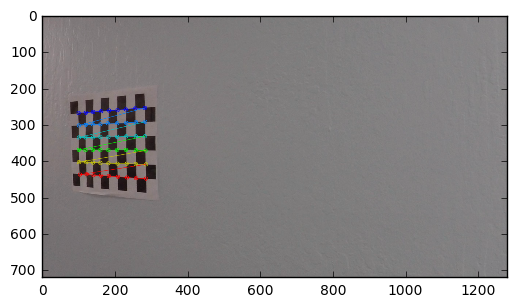

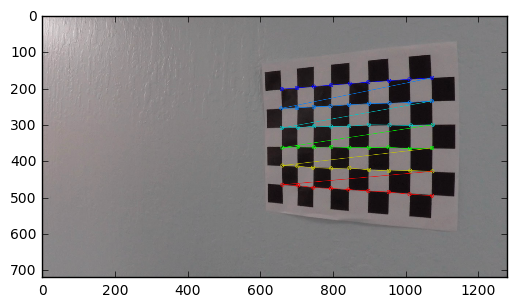

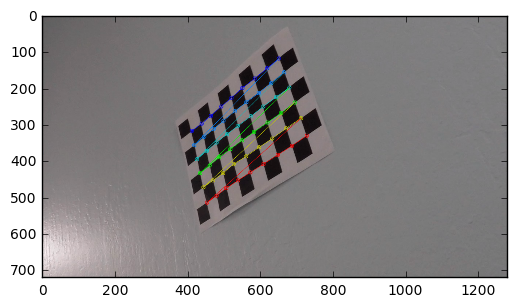

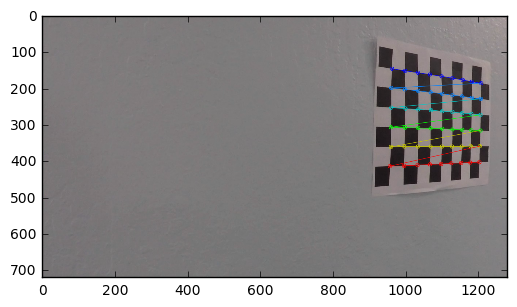

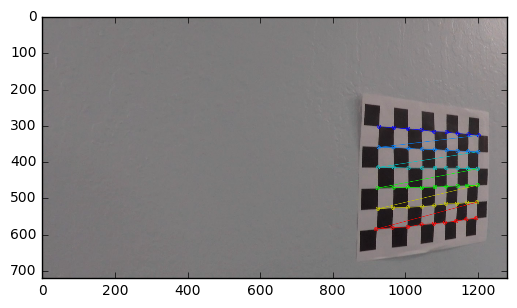

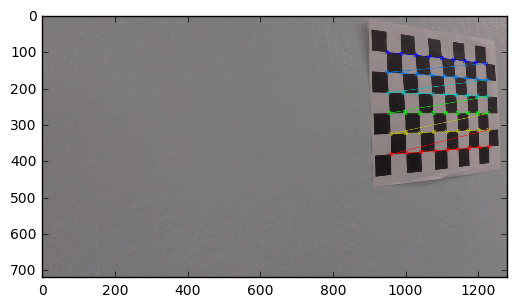

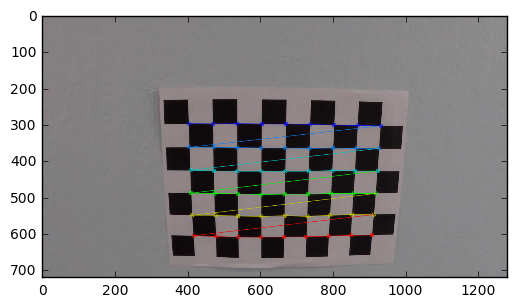

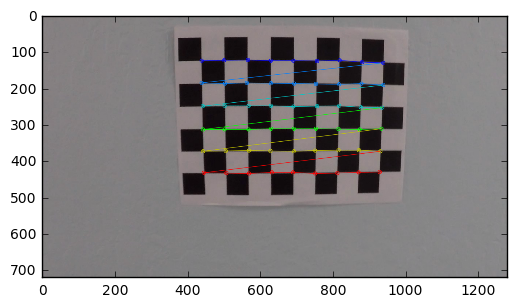

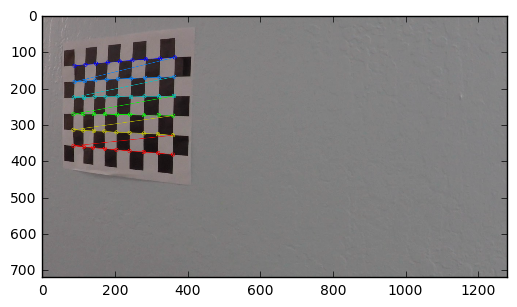

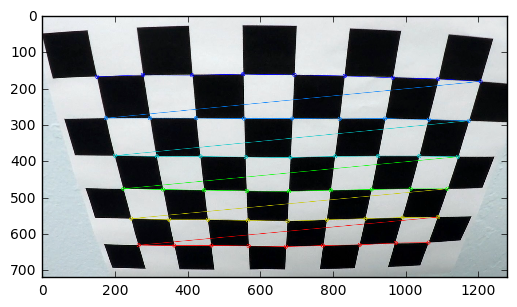

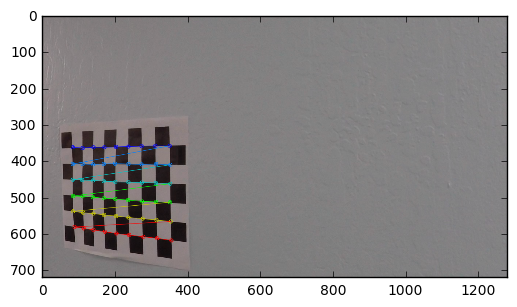

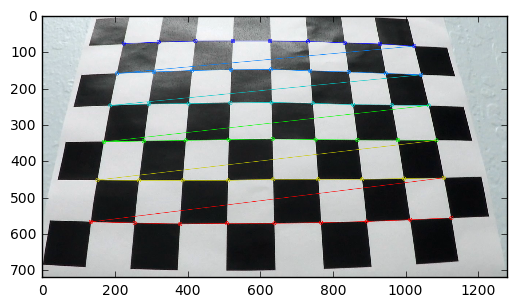

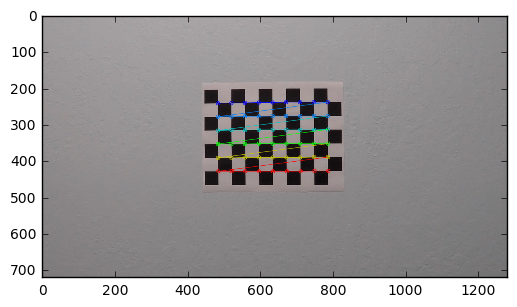

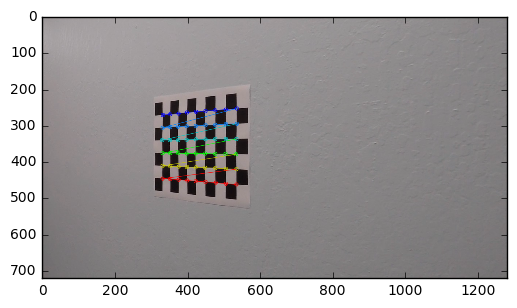

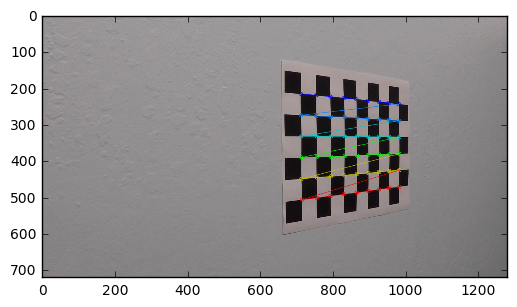

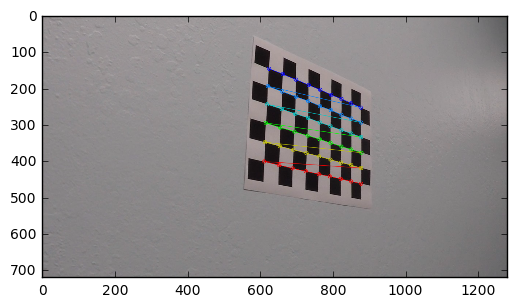

In [3]:
# number of corners in horizontal and vertical directions
nx = 9
ny = 6

# object point
objp=np.zeros((nx*ny,3),np.float32)
objp[:,:2]=np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

#
imgpoints = [] # 2d points in image plane.
objpoints = [] # 3d point in real world space

img_path=os.getcwd()+'/camera_cal/'

images = glob.glob(img_path+'calibration*.jpg')

for fname in images:
    # Load calibration images
    img=cv2.imread(fname)
    
    # Convert to gray scale
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # If corners found
    if ret==True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img, cmap='gray')
        plt.show()



In [4]:
# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [5]:
camera_cal={}
camera_cal['mtx']=mtx
camera_cal['dist']=dist
with open('camera_cal.p', mode='wb') as f:
    pickle.dump(camera_cal, f)

In [6]:
print(mtx)

[[  1.15396093e+03   0.00000000e+00   6.69705359e+02]
 [  0.00000000e+00   1.14802495e+03   3.85656232e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
